In [1]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123595 sha256=d178620ede6f48f9f5413f1dbb03faebeb389afa83bb66be3161a16f957f40a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-nz0qq_5v/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy

In [2]:
nb_erdos = 9

In [3]:
plt.rcParams["figure.figsize"] = (12,9)

In [4]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos"+str(nb_erdos)+"_nodes.sg",
                      path_links=path_directory + "erdos"+ str(nb_erdos)+ "_links.sg")
S.describe()

Nb of Nodes :  12
Nb of segmented nodes :  12.0
Nb of links :  46
Nb of segmented links :  80.0
Nb of event times :  64


In [5]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


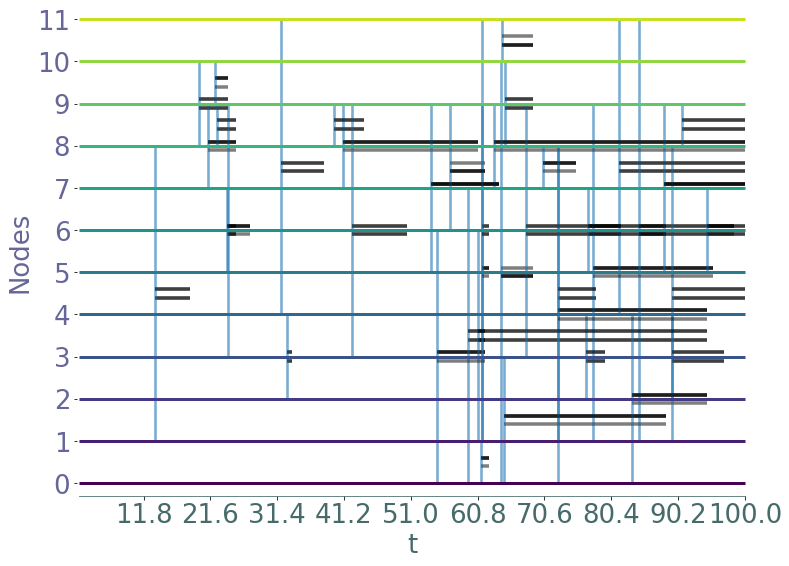

In [6]:
S.plot()

In [7]:
SS = S.stream_graph_to_link_stream()

In [8]:
SS.write_to_matthieu_link_stream("erdos" + str(nb_erdos))

In [9]:
betweenness, general_contri, nouveau, events, sigma_r, latency, prev_next , contri, before, after, deltasvvt, no_succ ,features = bt.betweenness_all(SS)

In [10]:
import os
check_exec = 0
for v in SS.nodes:
    print(v)
    for (w,t) in deltasvvt[v].keys():
        if (w,t) in no_succ[v]:
            cmd = 'python2 archive_code/contri_point_from_node.py '+ str(t) + ' '+ str(SS.node_to_label[w]) + ' Test/erdos'+ str(nb_erdos) +'_mat.ls lol'
            res_exec = os.system(cmd)
            check_exec += res_exec
            #print(cmd)
            #print(res_exec)
            contri = bt.read_dictionary("archive_code/lol_contri_point.pic")
            #print(contri)
            #print(contri[SS.node_to_label[v]])
            if contri[str(v)] != deltasvvt[v][(w,t)].val:
                print(cmd)
                print("probleme","v",v,"w",w,"t",t,"=>",contri[SS.node_to_label[v]],deltasvvt[v][(w,t)] )
print(res_exec)

0
1
2
3
4
5
6
7
8
9
10
11
0
